In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:

portfolio_returns = pd.read_csv("portfolio_returns.csv", index_col=0, parse_dates=True).squeeze()
portfolio_returns.name = "Strategy"


In [3]:
# Downloading SPY
spy = yf.download("SPY", start=portfolio_returns.index.min(), end=portfolio_returns.index.max(), interval="1wk", auto_adjust=True)
spy_returns = spy["Close"].pct_change().dropna()
spy_returns.name = "SPY"
spy_returns.head()


[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2024-12-30,-0.005143
2025-01-06,-0.019360
2025-01-13,0.029441
2025-01-20,0.017387
2025-01-27,-0.010116


In [4]:
# align spy returns and combine portfolio returns
combined_returns = pd.concat([portfolio_returns, spy_returns], axis=1).dropna()
combined_returns.head()


,Strategy,SPY
Date,,
2024-12-30,-0.006557,-0.005143
2025-01-06,-0.026034,-0.019360
2025-01-13,0.040945,0.029441
2025-01-20,0.012653,0.017387
2025-01-27,-0.004632,-0.010116


<Figure size 1200x600 with 0 Axes>

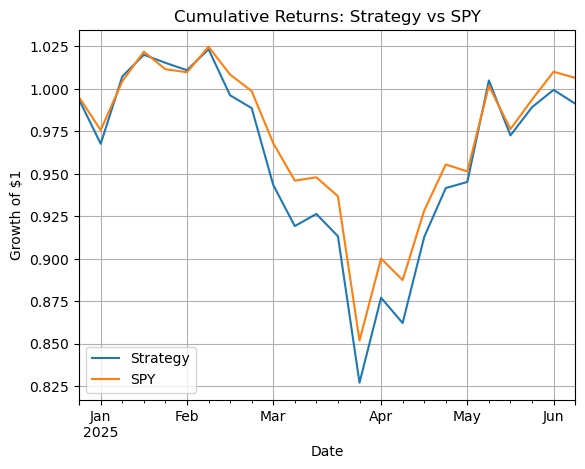

In [5]:
# Compute cumulative returns
cumulative_returns = (1 + combined_returns).cumprod()
# plot to compare and analyze
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title("Cumulative Returns: Strategy vs SPY")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()


In [6]:
# next we will compute some key performance metrics to analyse the portfolio
def annualized_return(r, periods_per_year=52):
    return (1 + r.mean())**periods_per_year - 1

def annualized_volatility(r, periods_per_year=52):
    return r.std() * np.sqrt(periods_per_year)
def sharpe_ratio(r, risk_free_rate=0.02, periods_per_year=52):
    excess_ret = r - (risk_free_rate / periods_per_year)
    return annualized_return(excess_ret, periods_per_year) / annualized_volatility(r, periods_per_year)
def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()
metrics = {}
for col in combined_returns.columns:
    r = combined_returns[col]
    cr = (1 + r).cumprod()
    metrics[col] = {
        "Ann. Return": annualized_return(r),
        "Ann. Volatility": annualized_volatility(r),
        "Sharpe Ratio": sharpe_ratio(r),
        "Max Drawdown": max_drawdown(cr)
    }

metrics_df = pd.DataFrame(metrics).T
metrics_df.style.format("{:.1%}")


,Ann. Return,Ann. Volatility,Sharpe Ratio,Max Drawdown
Strategy,1.3%,25.7%,-2.8%,-19.2%
SPY,3.9%,22.6%,8.2%,-16.9%


In [17]:
metrics_df.to_csv("strategy_vs_spy_metrics.csv")
